# Методы решения нелинейных уравнений

## Подключение необходимых библиотек

In [2]:
# модули для математических операций
import math
import numpy as np
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.7f}'.format

## Задача 1

На примере уравнения $$2\sin3x = x^2 - 4x + 3$$ провести сравнительный анализ следующих методов решения нелинейных уравнений:
1. метод Ньютона с постоянной производной;
2. метод секущих;
3. метод Стеффенсена;
4. метод Чебышева третьего порядка.

### Постановка задачи

Пусть задана функция $f(x)$ действительного переменного $x \in \mathbb{R}$. Требуется найти корни уравнения $$f(x) = 0,$$
или, что то же самое, нули функции $f(x)$. 

Выясним, является ли задача корректно поставленной. Для ответа на вопрос существования и единственности решения введем теорему из математического анализа.

**Теорема**. *Если функция $f(x)$ непрерывна на отрезке $[a,b]$ и принимает на его концах значения разных знаков, то на этом отрезке существует по крайней мере один корень уравнения $f(x) = 0$.
Если при этом функция $f(x)$ будет монотонной на отрезке $[a,b]$, то она может иметь только один корень.*

В данном случае вопрос непрерывной зависимости от входных данных отпадает.

### Общее описание метода решения задачи

При решении таких уравнений численными методами, необходимо заниматься решением сразу двух задач:
1. отделение корней;
2. вычисление корней с требуемой точностью.

### Отделение корней

Данный этап будет общим для всех рассматриваемых методов, так как в независимости от используемого метода сами корни уравнения не меняют своего расположения на числовой прямой. Этот этап необходим для того, чтобы в процессе приближения корня мы случайным образом не пришли к другому корню, не тому, для которого мы считали приближение. 

Суть этого этапа заключается в том, что мы выбираем для каждого корня отрезок, в котором он находится, при этом мы гарантируем, что других корней в этом отрезке нет.

Отделять корни будем, используя графический метод.

Для начала определим исследуемую функцию. Пусть $$f(x) = 2\sin3x - x^2 + 4x -3 = 0,$$
то есть корень этого уравнения мы и будем искать. Сразу заметим, что эта функция непрерывная, так как является результатом сложения непрерывных функций.

In [3]:
def f(x):
    return 2*np.sin(3*x) - x**2 + 4*x - 3

Сперва изобразим графически две следующие функции
$$y_1(x) = 2\sin3x,\quad y_2(x) = x^2 - 4x + 3,$$
графики которых несложно построить.
Причем предположим, что отрезка $[-10; 10]$ для начала нам будет достаточно (выбор этого отрезка основан на интуитивных предположениях).

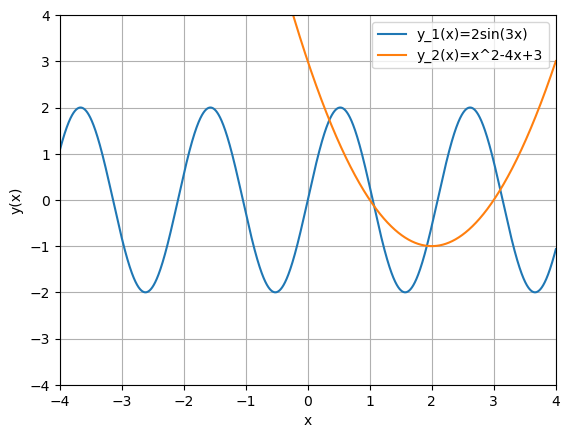

In [4]:
def y_1(x):
    return 2*np.sin(3*x)

def y_2(x):
    return x**2-4*x+3

x = np.linspace(-10, 10, 10000)

fig, ax = plt.subplots()
ax.plot(x, y_1(x), label='y_1(x)=2sin(3x)')
ax.plot(x, y_2(x), label='y_2(x)=x^2-4x+3')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Зная свойства параболы и синусоиды мы с уверенностью можем считать, что в данной плоскости два этих графика больше не пересекутся ни в какой другой точке кроме тех, что можно увидеть на графике выше. Таким образом, исследуемое нами уравнение имеет 4 действительных корня. 

Пусть корнем, для которого мы будем искать приближение, будет корень, лежащий слева (однако по аналогии можно найти приближенное значение любого из остальных корней). Этот корень лежит на отрезке $[0; 1]$. Причем из графика видно, что он располагается до точки, в которой функция $y_1(x) = 2\sin3x$ достигает значения $y_1(x) = 2$, то есть до точки $x = \dfrac\pi6$.
Таким образом, в качестве отрезка, на котором предположительно располагается исследуемый корень, мы можем взять отрезок $$d = \Big[0; \dfrac\pi6\Big].$$

In [5]:
d = np.linspace(0, math.pi/6, 10000)

Проверим выполнение условий теоремы о существовании и единственности корня уравнения на отрезке $d$.

Посчитаем значения функции $f(x)$ на концах отрезка $d = \Big[0; \dfrac\pi6\Big]$:
$$f(0) =2\sin0 - 0^2 + 4\cdot 0 -3 = -3 < 0.$$

In [6]:
f(0)

-3.0

$$f\Big(\dfrac\pi6\Big) = 2\sin \dfrac\pi2 - \dfrac{\pi^2}{36} + 4\dfrac\pi6 - 3 \approx 2 - 0.25 +2-3 = 0.75 > 0$$

In [7]:
f(math.pi/6)

0.8202394245851576

Функция на концах отрезка меняет знак, значит хотя бы один корень уравнения $f(x) = 0$ лежит в этом отрезке.

Исследуем функцию на монотонность. Для этого нам нужно оценить значение производной на отрезке. Определим первую производную исследуемой функции: $$f'(x) = 6\cos3x - 2x + 4.$$ Причем эта функция непрерывна на отрезке $d$, то есть $f\in C\Big[0; \dfrac\pi6\Big]$, так как является результатом сложения непрерывных на этом отрезке функций.

In [8]:
def derivative_f(x):
    return 6*np.cos(3*x)-(2*x-4)

Тот факт, что производная не изменяет знак на отрезке докажем аналитически. Разобъем производную на две элементарные функции
$$f'(x) = \underbrace{6\cos3x}_{z_1(x)} \underbrace{- 2x + 4}_{z_2(x)}.$$
Берем отрезок $d = \Big[0; \dfrac\pi6\Big]$. 

Функция $z_1(x) = 6\cos3x$ является на этом отрезке убывающей функцией по свойствам косинуса. Наибольшее значение $$y_1(0)= 6\cos0 = 6,$$ а наименьшее $$y_2\Big(\dfrac\pi6\Big) = 6\cos\dfrac\pi2 = 0.$$
Таким образом, $z_1(x)$ является строго положительной функцией на отрезке $d$. 

Рассмотрим функцию $z_2(x) = -2x + 4$. Она также является убывающей на отрезке $d$ функцией по свойствам линейной функции. Ее наибольшее значение $$z_2(0) = 4,$$ а наименьшее $$z_2\Big(\dfrac\pi6\Big) = -\dfrac\pi3 + 4\approx 3.$$
То есть эта функция также является строго положительной на отрезке $d$. 

В итоге функция $f'(x)$ состоит из суммы двух строго положительных на отрезке $d$ функций, а следовательно $$3 \leq f'(x) \leq 10 \Rightarrow f'(x) > 0\quad \forall x \in d=\Big[0; \dfrac\pi6\Big].$$ 
Действительно, с помощью компьютерных методов найдем максимум и минимум производной:

In [9]:
np.max(derivative_f(d))

10.0

In [10]:
np.min(derivative_f(d))

2.952802448803403

Что подтверждает наши аналитические рассуждения.

Таким образом, по теореме функция имеет единственный корень на отрезке $d = \Big[0; \dfrac\pi6\Big]$.

#### Вывод

Мы доказали, что выбранный нами отрезок числовой прямой содержит ровно один корень исследуемого уравнения. На этом решение задачи отделения корней можно закончить и переходить к отысканию приближенных значений корней, лежащих в этих отрезках с помощью указанных методов.

### Вычисление корней с требуемой точностью

#### Метод Ньютона с постоянной производной

##### Описание метода

Формула этого метода имеет следующий вид $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^0)},\quad k=0,1,\ldots;\quad x^0.$$
    
Геометрически это означает, что, выбрав $x^0$, мы движемся по касательной. Найдя $x^1$, мы будем двигаться из точки $x^1$ по той же касательной, т.е. все касательные будут параллельны касательной в точке, которая является начальным приближением к корню и так далее.

Обозначим $x^*$ -- точное решение уравнения $f(x) = 0$. Проделав необходимые вычисления можно получить соотношение для погрешности метода $$\varepsilon_{k+1}\approx\Big(1 - \dfrac{f'(x^*)}{f'(x^0)}\Big)\varepsilon_k.$$
Исходя из вида полученной формулы, мы можем утверждать, что такой метод имеет **линейную скорость сходимости**.

##### Теорема о сходимости метода Ньютона. 

Выберем начальное приближение так $x^0$, чтобы выполнялись условия сходимости итерационного процесса:
1. Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$ При этом на концах отрезка $f(x)f'(x)\ne 0$.
2. Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$

Тогда справедливы следующие утверждения:
1. Внутри отрезка $s_0$ уравнение $f(x) = 0$ имеет корень $x^*$ и при этом этот корень единственный.
2. Последовательность приближений $x^k$, $k=1,2,\ldots$ может быть построена по указанной выше формуле с заданным приближением $x^0$.
3. Последовательность $x^k$ сходится к корню $x^*$, то есть $x^k \xrightarrow[k\to\infty]{}x^*$.

##### Проверка условий сходимости метода

1. Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$ При этом на концах отрезка $f(x)f'(x)\ne 0$. 

Зададим в качестве начального приближения примерно середину рассматриваемого отрезка $d=\Big[0; \dfrac\pi6\Big]$, то есть $$x_0 = 0.25.$$

In [11]:
x_0 = 0.25
print('x_0 =', x_0) 
h_0 = - f(x_0) / derivative_f(x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0 + 2*h_0, 10000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = 0.25
h_0 = 0.08861985736562038
s_0 = [ 0.25 ; 0.4272397147312408 ]


Функция $f(x)$ на отрезке $s_0$ непрерывна и дважды непрерывно дифференцируема на этом отрезке, так как она непрерывна и дважды непрерывно дифференцируема на отрезке $d$, а $s_0 \subset d$. Рассмотрим значения на концах отрезка:
- левый конец:

In [12]:
f(s_0[0])*derivative_f(s_0[0])

-5.51695851252587

- правый конец:

In [13]:
f(s_0[-1])*derivative_f(s_0[-1])

2.1533114327715905

То есть первое условие сходимости выполнено. 

2. Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$

Определим вторую производную исследуемой функции:
$$f''(x) = -18\sin3x - 2.$$
Эта функция непрерывна на всей числовой прямой, так как $\sin$ -- непрерывная на числовой прямой функция.

In [14]:
def second_derivative_f(x):
    return -18*np.sin(3*x) - 2

Попытаемся оценить максимум модуля второй производной на отрезке аналитически. На отрезке $s_0 = [0.25, 0.43]$ функия $\sin3x$ является строго возрастающей. Соответственно наибольшее значение она примет на правом конце отрезка $\sin (3\cdot 0.43) \approx \sin 1.29$. Тогда наименьшее значение (но по модулю наибольшее) второй производной $$f''(0.43)\approx -18\sin1.29 - 2\geq -20.$$
Тогда $$M = 20.$$
Проверим, выполнено ли неравенство:

In [15]:
2*np.absolute(h_0)*20 <= np.absolute(derivative_f(x_0))

True

Для проверки того, что найденное значение $M$ близко к реальности, воспользуемся компьютерным методом нахождения $M$:

In [16]:
M = np.max(np.absolute(second_derivative_f(s_0)))
M

19.253132284654036

То есть полученное нами значение оказалось достаточно близким к реальному. И соответственно для реального $M$ также проверим выполнение неравенства:

In [17]:
2*np.absolute(h_0)*M <= np.absolute(derivative_f(x_0))

True

Оба условия сходимости выполнены, значит при выбранном начальном приближении $x^0$ итерационный процесс гарантировано будет сходящимся.

##### Программная реализация итерационного процесса

В первую очередь нам необходимо задать точность приближения решения. Пусть эта точность для этого и последующих методов будет равна $$\varepsilon = 10^{-7}.$$

In [18]:
epsilon = 1e-7

Теперь реализуем сам итерационный процесс, который будет идти до тех пор, пока $$|x^{k+1} - x^{k}| \geq \varepsilon.$$
На каждом шаге мы будем записывать текущее значение $x^k$ и значение разности $(k+1)$-ого и $k$-ого приближений в таблицу, а в конце посчитаем количество итераций, необходимое для достижения заданной точности приближения. Также мы выведем время, затрачиваемое на выполнение итерационного процесса.

In [19]:
def phi(x):
    return x - f(x) / derivative_f(x_0)

In [20]:
x_k = x_0
x_k1 = phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)])

In [21]:
newton_table = pd.DataFrame(iterations, columns=[('Метод Ньютона', 'x_k'), ('Метод Ньютона', '|x_k+1 - x_k|')])
newton_table.columns = pd.MultiIndex.from_tuples(newton_table.columns, names=['Назание метода', ''])
newton_table

Назание метода Метод Ньютона              
                         x_k |x_k+1 - x_k|
0                  0.3386199     0.0886199
1                  0.3462644     0.0076445
2                  0.3476910     0.0014266
3                  0.3479715     0.0002805
4                  0.3480272     0.0000557
5                  0.3480383     0.0000111
6                  0.3480405     0.0000022
7                  0.3480410     0.0000004
8                  0.3480411     0.0000001

Таким образом, мы смогли достичь заданной точности за 9 итераций, а заодно получили приближенный корень уравнения в выбранном нами отрезке.

#### Метод секущих

##### Описание метода

Формула этого метода имеет следующий вид $$x^{k+1} = x^k - f(x^k)\dfrac{x^k - x^{k-1}}{f(x^k) - f(x^{k-1})},\ k = 1,2,\ldots;\ x^0, x^1.$$
Однако мы должны знать не только $x^0$, но и $x^1$, поэтому метод секущих двухшаговый.

Геометрически мы выбираем два приближения $x^0$ и $x^1$ и через две эти точки мы проводим прямую, и она является не касательной, а секущей. Таким образом, при пересечении секущей с осью $Ox$ мы получаем точку $x^2$. Проводим через $x^1$ и $x^2$ следующую секущую, получаем точку $x^3$ и так далее.

Количество операций в этом случае сравнимо с количеством операций метода Ньютона с постоянной производной. Но при этом мы выигрываем в скорости, покажем это. Cоотношение между погрешностями $$\varepsilon_{k+1}\approx -\dfrac{1}{2} \dfrac{f''(x^*)}{f'(x^*)}\varepsilon_k\varepsilon_{k-1}.$$
Таким образом, она **выше чем линейная, но ниже, чем квадратичная**. Для уточнения необходимо преобразовать данную величину. Соотношение на $k+1$ и $k$ итерациях может быть оценено как $$\varepsilon_{k+1}\approx C\varepsilon_k^\alpha,\quad \alpha = \dfrac{1+\sqrt5}{2}.$$

##### Исследование условий сходимости метода
Будем предполагать, что метод секущих сходится для того же отрезка и того же начального приближения, что и предыдущий метод.

##### Программная реализация итерационного процесса
Точность приближения возьмем ту же, что и в предыдущем методе, для того, чтобы сравнить оба метода между собой. Аналогичным образом реализуем итерационный процесс.

Но только в данном случае нам необходимо заранее задать еще $x^1$, которое мы возьмем как середину отрезка $s_0$, то есть $$x^1 = x^0 - \dfrac{f(x_0)}{f'(x_0)} = x^0 + h_0,\quad f'(x_0) \ne 0.$$

In [22]:
def phi(x_k, x_k1):
    return x_k - f(x_k) * (x_k - x_k1) / (f(x_k) - f(x_k1))

In [23]:
x_k = x_0
x_k1 = x_0 + h_0
x_k2 = phi(x_k, x_k1)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
iterations.append([x_k2, np.absolute(x_k2 - x_k1)])
while np.absolute(x_k2 - x_k1) >= epsilon:
    x_k = x_k1
    x_k1 = x_k2
    x_k2 = phi(x_k, x_k1)
    iterations.append([x_k2, np.absolute(x_k2 - x_k1)])

In [24]:
secant_table = pd.DataFrame(iterations, columns=[('Метод секущих', 'x_k'), ('Метод секущих', '|x_k+1 - x_k|')])
secant_table.columns = pd.MultiIndex.from_tuples(secant_table.columns, names=['Назание метода', ''])
secant_table

Назание метода Метод секущих              
                         x_k |x_k+1 - x_k|
0                  0.3386199     0.0886199
1                  0.3469861     0.0083662
2                  0.3480275     0.0010414
3                  0.3480411     0.0000135
4                  0.3480411     0.0000000

In [25]:
comparison_table = pd.concat([newton_table, secant_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих              
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|
0                  0.3386199     0.0886199     0.3386199     0.0886199
1                  0.3462644     0.0076445     0.3469861     0.0083662
2                  0.3476910     0.0014266     0.3480275     0.0010414
3                  0.3479715     0.0002805     0.3480411     0.0000135
4                  0.3480272     0.0000557     0.3480411     0.0000000
5                  0.3480383     0.0000111                            
6                  0.3480405     0.0000022                            
7                  0.3480410     0.0000004                            
8                  0.3480411     0.0000001

В данном случае мы смогли достичь нужной нам точности также за 5 итераций, что является меньшим числом, чем в предыдущем методе. Таким образом, мы действительно выиграли в скорости по сравнению с методом Ньютона с постоянной производной. Но, как было оговорено ранее, по количеству арифметических операций мы остались примерно на том же уровне.

#### Метод Стеффенсена

##### Описание метода
Формула этого метода имеет следующий вид
$$x^{k+1} = \dfrac{x^k \varphi(\varphi(x^k)) - (\varphi(x^k))^2}{\varphi(\varphi(x^k)) - 2 \varphi(x^k) + x^k},\ k=0,1,\ldots;\ x^0.$$
Метод Стеффенсена можно трактовать как метод простой итерации примененный к уравнению вида $$x = \Phi(x),$$ где $$\Phi(x) = \dfrac{x \varphi(\varphi(x)) - \varphi^2(x)}{\varphi(\varphi(x)) - 2\varphi(x) + x}.$$ 
Можно утверждать, что сходимость метода Стеффенсена будет квадратичной. Но в 2 раза увеличивается объем вычислений по сравнению с методом простой итерации из-за того, что нужно вычислять функцию $\varphi(\varphi(x))$.

Мы можем гарантировать сходимость метода Стеффенсена в случае, когда исходный метод простой итерации является сходящимся.

Таким образом, алгоритм дальнейших действий следующий:
- построить формулу канонический вид итерационного процесса $x = \varphi(x)$;
- исследовать сходимость итерационного процесса;
- перестроить итерационную формулу по методу Стеффенсена;
- программно реализовать построенный итерационный процесс.

##### Построение формулы канонического вида итерационного процесса
Сперва нам необходимо задать формулу для итерационного процесса $x = \varphi(x)$. Будем строить ее следующим образом. Возьмем наше исходное уравнение $$f(x) = 0,$$ домножим с двух сторон на постоянную $\lambda$ и прибавим с двух сторон $x$, то есть $$x = \underbrace{x + \lambda f(x)}_{\varphi(x)}.$$ Тогда проверим выполнение условия $$|\varphi'(x)| = |1 + \lambda f'(x)| < 1.$$
Отсюда $$-2< \lambda f'(x)< 0.$$ Нам известно, что на отрезке $d$ производная имеет положительный знак. Тогда $$-\dfrac{2}{M} < \lambda < 0,\quad M = \max_{[0; \frac\pi6]}|f'(x)|.$$
Оценим значение $M$ аналитически. Ранее мы получили, что $f''(x)= -18\sin3x - 2$, и эта функция на отрезке $d = \Big[0; \dfrac\pi6\Big]$ является строго отрицательной за счет того, что $$0\geq\sin3x\geq 1,\quad \forall x \in d.$$
Отсюда $f'(x)$ является монотонно убывающей. Ранее мы также пришли к тому, что $$3 \leq f'(x) \leq 10,$$ а тогда $$M = 10.$$
С помощью компьютерных методов убедимся в том, что это действительно так:

In [26]:
M = np.max(np.absolute(derivative_f(d)))
M

10.0

Тогда мы можем выбрать $$\lambda \in (-0.2; 0).$$ Тогда возьмем, к примеру, $\lambda = -0.05$

In [29]:
Lambda = -0.1

Таким образом, мы можем задать функцию для канонического вида: $$\varphi(x) = x - 0.05 \cdot (2\sin 3x - x^2 + 4x - 3).$$

In [30]:
def phi(x):
    return x + Lambda * f(x)

##### Исследование условий сходимости метода
Так как метод Стеффенсена является модификацией метода простой итерации, то и для сходимости метода нам необходимо проверить выполнение условий сходимости метода простой итерации. 

**Теорема о сходимости метода простой итерации**.
Пусть выполняются следующие условия:
1. функция $\varphi(x)$ определена на отрезке $$\Delta = |x - x^0| \leq \delta,$$ непрерывна на нем и удовлетворяет условию Липшица с постоянным коэффициентом меньше единицы, то есть $\forall x, \widetilde{x}$ $$|\varphi(x) - \varphi(\widetilde{x})| \leq q |x - \widetilde{x}| ,\quad 0 \leq q < 1;$$
2. для начального приближения $x^0$ верно неравенство $$|x^0 - \varphi(x^0)| \leq m;$$
3. числа $\delta, q, m$ удовлетворяют условию $$\dfrac{m}{1-q}\leq \delta.$$

Тогда
1. уравнение $f(x) = 0$ в области $\Delta$ имеет решение;
2. последовательность $x^k$ построенная по правилу $x = \varphi(x)$ принадлежит отрезку $[x^0 - \delta, x^0 + \delta]$, является сходящейся и ее предел удовлетворяет уравнению $f(x) = 0$: $$x^k \xrightarrow[k\to \infty]{} x^*;$$

**Замечание.** Для построения сходящегося метода простой итерации в практических вычислениях условие 1 теоремы о сходимости метода простой итерации обычно заменяется более строгим требованием, а именно для всех $x$ из отрезка $|x - x^0| \leq \delta$ функция $\varphi(x)$ имеет непрерывную первую производную $\varphi'(x)$ такую, что $$|\varphi'(x)|\leq q <1 \quad \forall x \in [x_0 - \delta; x_0 + \delta].$$

Исследуем сходимость построенного итерационного процесса. 
1. функция $\varphi(x)$ определена на отрезке $$\Delta = |x - x^0| \leq \delta,$$ непрерывна на нем и удовлетворяет условию  $\forall x$ $$|\varphi'(x)|\leq q <1;$$ 
Возьмем $$\Delta = [0; 0.5]\subset d.$$ Сперва зададим начальное приближение как середину рассматриваемого отрезка $x_0 = 0.25$. Очевидно на этом отрезке функция определена, непрерывна и дифференцируема (мы показали это ранее).

In [31]:
Delta = np.linspace(0, 0.5, 10000)
x_0 = (Delta[0] + Delta[-1])/2
print('x_0 =', x_0)

x_0 = 0.25


In [32]:
delta = x_0 - Delta[0]
print('delta =', delta)

delta = 0.25


То есть $\delta = 0.25$.

Заменим условие Липшица условием из замечания для отыскания числа $q$. Для этого продифференцируем функцию $\varphi(x)$:
$$\varphi'(x) = 1+\lambda f'(x) = 1 - 0.05 \cdot (6\cos 3x - 2x + 4).$$ Ранее мы показали, что $f'(x) > 3$, тогда $$\varphi'(x) < 1 - 0.05 \cdot 3 \leq 0.85 = q.$$

2. для начального приближения $x^0$ верно неравенство $$|x^0 - \varphi(x^0)| \leq m;$$

Попробуем вычислить значение $m$ аналитически:
$$| 0.25 - (0.25 - 0.05(2\sin0.75 - 0.0625 + 1 -3 ) | = |0.05(2\sin0.75 -1.9375)| \leq |0.05(2\sin\dfrac\pi4 -1.9375)|=|0.05(\sqrt2 - 1.9375)| \approx0.026$$
То есть $$m = 0.026.$$

3. числа $\delta, q, m$ удовлетворяют условию $$\dfrac{m}{1-q}\leq \delta.$$

In [33]:
0.026 / (1-0.85) <= delta

True

Таким образом, все условия сходимости метода выполнены. 

Для того, чтобы убедится в том, что мы не слишком далеко ушли от реальных значений $q$ и $m$, вычислим их компьютерными методами:

In [34]:
q = np.max(np.absolute(1+Lambda*derivative_f(Delta)))
q

0.6575576789993782

In [35]:
m = np.absolute(x_0 - phi(x_0))
m

0.0699222479953332

In [36]:
m / (1-q) <= delta

True

Компьютерные значения параметров оказались не так далеки в пределах погрешности от вычисленных нами значений. И аналогично метод при компьютерных значениях также сходится.

Таким образом, мы построили итерационную формулу, соблюдая все условия теоремы о сходимости. То есть на данный момент у нас есть формула сходящегося процесса метода простой итерации. Перестроим эту формулу так, чтобы получился метод Стеффенсена.

##### Перестроение итерационной формулу по методу Стеффенсена
Вспомним, что метод Стеффенсена задается формулой $$x = \Phi(x),$$ где $$\Phi(x) = \dfrac{x \varphi(\varphi(x)) - \varphi^2(x)}{\varphi(\varphi(x)) - 2\varphi(x) + x}.$$ 

In [37]:
def Phi(x):
    return x - (x-phi(x))**2 / (phi(phi(x)) - 2*phi(x) + x)

Исходный итерационный процесс сходился, поэтому и новый построенный итерационный процесс будет также сходящимся. Поэтому перейдем сразу к программной реализации итерационного процесса.

##### Программная реализация итерационного процесса
Все условия остановки итерационного процесса переходят с прошлых методов. Т.е. $\varepsilon = 10^{-7}$, и условие останова $$|x^{k+1} - x^k| < \varepsilon.$$

In [38]:
x_k = x_0
x_k1 = Phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]

while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = Phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)])

In [39]:
steffensen_table = pd.DataFrame(iterations, columns=[('Метод Стеффенсена', 'x_k'), ('Метод Стеффенсена', '|x_k+1 - x_k|')])
steffensen_table.columns = pd.MultiIndex.from_tuples(steffensen_table.columns, names=['Назание метода', ''])
steffensen_table

Назание метода Метод Стеффенсена              
                             x_k |x_k+1 - x_k|
0                      0.3449940     0.0949940
1                      0.3480364     0.0030424
2                      0.3480411     0.0000047
3                      0.3480411     0.0000000

In [40]:
comparison_table = pd.concat([newton_table, secant_table, steffensen_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих                \
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|   
0                  0.3386199     0.0886199     0.3386199     0.0886199   
1                  0.3462644     0.0076445     0.3469861     0.0083662   
2                  0.3476910     0.0014266     0.3480275     0.0010414   
3                  0.3479715     0.0002805     0.3480411     0.0000135   
4                  0.3480272     0.0000557     0.3480411     0.0000000   
5                  0.3480383     0.0000111                               
6                  0.3480405     0.0000022                               
7                  0.3480410     0.0000004                               
8                  0.3480411     0.0000001                               

Назание метода Метод Стеффенсена                
                             x_k |x_k+1 - x_k|  
0                      0.3449940     0.0949940  
1                      0.3480364     0.0030424  
2                      0.3480411     0.0000047  
3                      0.3480411     0.0000000  
4                                               
5                                               
6                                               
7                                               
8

Таким образом, в методе Стеффенсена нам понадобилось 4 итерации, что оказалось еще меньше, чем в методе секущих. То есть мы выиграли в количестве итераций, однако количество операций в данном методе уже больше, чем в предыдущих.

#### Метод Чебышева третьего порядка

##### Описание метода
Идея метода базируется на способе построения итерационного процесса таким образом, чтобы обеспечить обращение в ноль производных от функции $\varphi(x)$ в точке $x^*$, то есть мы берем уравнение $$x = \varphi(x)$$ и стараемся построить метод, у которого максимальное количество производных обращается в ноль в точке $x^*$. Мы можем построить итерационный процесс третьего порядка с **кубической скоростью сходимости** $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)} - \dfrac{f^2(x^k)f''(x^k)}{2(f'(x^k))^3}$$ и будем называть эту формулу **методом Чебышева**. В этом методе мы также увеличиваем количество операций, так как необходимо вычислять значения $f(x), f'(x), f''(x)$.

##### Исследование условий сходимости метода

Условия на сходимость метода Чебышева мы не исследовали, однако будем предполагать, что итерационный процесс будет также сходящимся на выбранном отрезке $d = \Big[0; \dfrac\pi6\Big]$ и при выбранном начальном приближении $x^0 = 0.25$ (впрочем мы доказали, что метод Ньютона и метод простой итерации при выбранных параметрах сходятся).

##### Программная реализация метода

In [38]:
def phi(x):
    return x - f(x)/derivative_f(x) - ((f(x))**2 * second_derivative_f(x)) / (2 * (derivative_f(x))**3)

In [39]:
x_k = x_0
x_k1 = phi(x_0)
iterations = [[x_k1, np.absolute(x_k1 - x_k)]]
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    iterations.append([x_k1, np.absolute(x_k1 - x_k)]) 

In [40]:
chebyshev_table = pd.DataFrame(iterations, columns=[('Метод Чебышева', 'x_k'), ('Метод Чебышева', '|x_k+1 - x_k|')])
chebyshev_table.columns = pd.MultiIndex.from_tuples(chebyshev_table.columns, names=['Назание метода', ''])
chebyshev_table  

Назание метода Метод Чебышева              
                          x_k |x_k+1 - x_k|
0                   0.3457215     0.0957215
1                   0.3480410     0.0023196
2                   0.3480411     0.0000001

In [41]:
comparison_table = pd.concat([newton_table, secant_table, steffensen_table, chebyshev_table], axis=1).fillna(' ')
comparison_table

Назание метода Метод Ньютона               Метод секущих                \
                         x_k |x_k+1 - x_k|           x_k |x_k+1 - x_k|   
0                  0.3386199     0.0886199     0.3386199     0.0886199   
1                  0.3462644     0.0076445     0.3469861     0.0083662   
2                  0.3476910     0.0014266     0.3480275     0.0010414   
3                  0.3479715     0.0002805     0.3480411     0.0000135   
4                  0.3480272     0.0000557     0.3480411     0.0000000   
5                  0.3480383     0.0000111                               
6                  0.3480405     0.0000022                               
7                  0.3480410     0.0000004                               
8                  0.3480411     0.0000001                               

Назание метода Метод Стеффенсена               Метод Чебышева                
                             x_k |x_k+1 - x_k|            x_k |x_k+1 - x_k|  
0                      0.3416070     0.0916070      0.3457215     0.0957215  
1                      0.3480027     0.0063956      0.3480410     0.0023196  
2                      0.3480411     0.0000384      0.3480411     0.0000001  
3                      0.3480410     0.0000000                               
4                                                                            
5                                                                            
6                                                                            
7                                                                            
8

Таким образом, метод Чебышева дал нам необходимое приближение за еще меньшее число итераций, оказавшись самым быстрым по сходимости из всех рассмотренных методов.

## Вывод 
В процессе решения задачи отыскания корней заданного уравнения мы решили также задачи отделения корней, а затем отыскания приближенных решений. Для каждого из рассмотренных методов отыскания приближенных решений была доказана сходимость методов. Мы нашли приближенное с точностью до 7 знаков одно решение уравнение, однако описанными методами можно также найти приближенные значения и всех остальных корней уравнения. Но для этого нужно будет провести отделение корней, выбрать начальные приближения и обосновать сходимость для каждого корня.

Также мы на практике подтвердили все теоретические выкладки о скорости сходимости методов:
- самым медленным оказался метод Ньютона с постоянной производной, обладающий линейной скоростью сходимости;
- метод секущих имеет скорость сходимости выше линейной, но ниже квадратичной, поэтому он оказался быстрее;
- метод Стеффенсена имеет квадратичную скорость сходимости, поэтому он справился быстрее метода секущих;
- метод Чебышева третьего порядка имеет кубическую скорость сходимости, и он очевидно быстрее всех предыдущих методов.

## Задача 2

Найти с точностью $\varepsilon = 10^{-6}$ наибольший по модулю корень уравнения $$\sum\limits_{i=0}^n a_ix^i = 0,$$ где вектор коэффициентов $a$ есть решение системы линейных алгебраических уравнений $$Aa = f$$ с $$A = \begin{pmatrix} 5 & -1.2 & 3.5 & 1 & -0.1\\ 1.1 & -9.8 & -1.1 & 0.1 & 2.3 \\ -1.1 & 3.1 & 13 & 2.5& 4.6 \\ 0.2& 0.3& 2.3& 15.6& 2\\ 0.1&-2.8 & 4 & 3.2& -17.8 \end{pmatrix},\quad f =\begin{pmatrix} 2\\ 0.6\\ 2.7\\ -3.4\\ 5 \end{pmatrix}$$

### Описание метода решения задачи

Данная задача разбивается на две задачи:
1. отыскание решения системы линейных уравнений;
2. численное отыскание наибольшего по модулю корня уравнения.

### Отыскание решения системы линейных уравнений

Для решения системы линейных алгебраических уравнений воспользуемся методом Гаусса с выбором главного элемента по столбцу. Описание алгоритма данного метода мы опустим, так как эта задача решалась нами ранее.

In [42]:
def gaussian(matrix, column):
    insertions = 0 # Число перестановок
    A = matrix.copy() # Сохраняем переданную матрицу в локальную переменную
    b = column.copy() # Сохраняем переданный столбец в локальную переменную
    for k in range(A.shape[0]):
        leading_row = k # Столбец, в котором ведущий элемент, считаем равным номеру шага
        for i in range(k, A.shape[0]): # находим максимальный по модулю элемент в столбце
            if math.fabs(A[i][k]) > math.fabs(A[leading_row][k]):
                leading_row = i # Номер столбца с ведущим элементом принимает значение того, ...
                # ...в котором находится больший элемент, чем текущий ведущий элемент
        for j in range(k, A.shape[1]): # меняем местами строку, в которой главный элемент, со строкой равной номеру шага
            A[leading_row][j], A[k][j] =  A[k][j], A[leading_row][j]
        insertions+=1 # повышаем число перестановок
        
        # Прямой ход
        q = b[k] / A[k][k]
        for j in range(A.shape[0] - 1, k - 1, -1):
            c = A[k][j] / A[k][k]
            for i in range(A.shape[0] - 1, k, -1):
                    A[i][j] = A[i][j] - A[i][k]*c
                    if j == A.shape[0] - 1:
                        b[i] = b[i] - A[i][k]*q
    
    # Обратный ход
    x=np.zeros(A.shape[0]) # Создаем итоговый вектор решений, заполненный нулями
    for i in range(A.shape[0]-1, -1, -1):
        summary = 0
        for j in range(i+1, A.shape[0]):
            summary += A[i][j]*x[j]
        x[i] = (b[i] - summary) / A[i][i]
    
    return x;

In [43]:
A = np.array([[5, -1.2, 3.5, 1, -0.1],
              [1.1, -9.8, -1.1, 0.1, 2.3],
              [-1.1, 3.1, 13, 2.5, 4.6],
              [0.2, 0.3, 2.3, 15.6, 2],
              [0.1, -2.8, 4, 3.2, -17.8]])
f = np.array([2, 0.6, 2.7, -3.4, 5])

In [44]:
a = gaussian(A, f)
print(*a, sep='\n')

0.1466017362173818
-0.14061178804228955
0.37756997790570673
-0.24495232438669967
-0.21714574979070014


Полученный вектор является вектором коэффициентов для исследуемого нами многочлена. Причем многочлен составляется следующим образом: $$P(x) = -0.21714574979070014x^4 -0.24495232438669967x^3 + 0.37756997790570673x^2 -0.14061178804228955x + 0.1466017362173818 = 0$$

Определим функцию для самого многочлена, с помощью которой мы сможем проверять, является ли найденное нами число корнем уравнения.

In [45]:
def P(x):
    P = 0
    n = len(a)
    for i in range(n):
        P += x**i * a[i]
    return P

### Численное отыскание наибольшего по модулю корня уравнения, метод Лобачевского

##### Описание метода
Метод Лобачевского является методом отыскания корней алгебраического уравнения. Данные метод не требует предварительного задания начального приближения для корней и кроме того позволяет найти сразу все корни.

Рассмотрим алгебраическое уравнение следующего вида $$P(x) = a_0x^n + a_1x^{n-1} + \ldots + a_{n-1}x + a_n = 0,\quad a_0 \ne 0.$$
Пусть $a_i\in \mathbb{R}$ и предположим, что все корни $x_i$ простые, вещественные и удовлетворяют соотношению $$|x_1| >> |x_2| >> \ldots >> |x_n|.$$

Кратко метод Лобачевского заключается в том, что мы заменяем исходный многочлен новым многочленом, корни которого являются квадратами корней исходного многочлена. Делаем мы это с помощью вычисления новых коэффициентов для нового многочлена, эта операция также называется *квадрированием*. Коэффициенты нового полинома рассчитываются по формулам $$\begin{cases}
	a_0^{(1)} = a_0^2,\\
	a_1^{(1)} =2a_0a_2 - a_1^2,\\
	a_2^{(1)} = 2a_0a_4 - 2a_1a_3 + a_2^2,\\
    a_3^{(1)} = 2a_0a_6 - 2a_1a_5 + 2a_2a_4 - a_3^2,\\
    a_4^{(1)} = 2a_0a_8 - 2a_1a_7 + 2a_2a_6 - 2a_3a_5 + a_4^2,\\
	\dotfill\\
	a_n^{(1)} = (-1)^na_n^2.
\end{cases}$$

Предположим, что на основании соотношения для коэффициентов мы можем построить последовательность многочленов $$P_k(x) = a_0^{(k)}x^n + a_1^{(k)}x^{n-1} + \ldots + a_n^{(k)}$$ и корнями каждого уравнения $P_k(x) = 0$ будут являться $x_i^{2^k}$, где $x_i$ --- корни исходного уравнения. Тогда на каком-то $k$-ом шаге, предполагая сильную разделенность корней, воспользуемся формулой $$x_i^{2^k}\approx - \dfrac{a_i^{(k)}}{a_{i-1}^{(k)}},\quad i =\overline{1,n},$$
а отсюда мы можем извлечь корень степени $2^k$ и найти модули корней исходного уравнения, а их знаки определим подстановкой в многочлен.

##### Программная реализация метода

Зададим данную в условии точность $\varepsilon = 10^{-6}$.

In [46]:
epsilon=1e-6

Ниже указана функция, которая реализует алгоритм метода Лобачевского для случая многочлена 4-ой степени. Причем заметим, что, так как нам нужен лишь наибольший по модулю корень, то искать этот корень мы будем по формуле $$x_1^{2^k}\approx - \dfrac{a_1^{(k)}}{a_{0}^{(k)}},$$
подсчет остальных корней нам не требуется. В качестве результата работы алгоритма нам вернется модуль корня, имеющего наибольшее по модулю значение, и таблица значений коэффициентов и корня на каждой итерации.

Также заметим, что в самом алгоритме мы сделаем нормировку исходного вектора коэффициентов, дабы коэффициент перед слагаемым наибольшей степени был равен единице.

In [47]:
def lobachevsky_method(a, epsilon=1e-6):
    norm_a = a[::-1] # делаем reverse вектора коэффициентов, чтобы иметь соответствие с формулами
    norm_a = (norm_a / norm_a[0]).tolist() # нормируем вектор коэффициентов, чтобы иметь a_0 = 1
    coefs_i = [] # создаем список коэффициентов на каждой итерации
    x_i = [] # создаем список значений модуля корня на каждой итерации
    k = 1 # номер шага
    x_k = 0 # значение корня на k-ой итерации
    a_k = norm_a.copy() # вектор коэффициентов на k-ой итерации
    a_k1 = norm_a.copy() # вектор коэффициентов на (k+1)-ой итерации
    x_k1 = -a_k[1] / a_k[0] # значение корня на (k+1)-ой итерации
    coefs_i.append(a_k1.copy()) # добавляем текущее значение коэффициентов в список коэффициентов
    x_i.append(x_k1) # добавляем текущее значение модуля корня в список значений
    while abs(x_k1 - x_k) >= epsilon: # условие останова при достижении заданной точности
        # -----------------------------------------------------
        # вычисление коэффициентов в соответствии с указанным выше соотношением:
        a_k1[0] = a_k[0]**2
        a_k1[1] = 2*a_k[0]*a_k[2] - a_k[1]**2
        a_k1[2] = 2*a_k[0]*a_k[4]- 2*a_k[1]*a_k[3] + a_k[2]**2
        a_k1[3] = 2*a_k[2]*a_k[4]- a_k[3]**2
        a_k1[4] = a_k[4]**2
        # -----------------------------------------------------
        a_k = a_k1.copy() # сохраняем вектор коэффициентов из одной переменной в другую
        x_k = x_k1 # сохраняем значение корня из одной переменной в другую
        x_k1 = (-a_k[1] / a_k[0])**(1/2**k) # вычисляем значение модуля корня в соответствии с указанной формулой
        k+=1 # повышаем шаг на 1
        coefs_i.append(a_k1.copy()) # добавляем текущее значение коэффициентов в список коэффициентов
        x_i.append(x_k1) # добавляем текущее значение модуля корня в список значений
    table = pd.concat([pd.DataFrame(coefs_i, columns=['a_0', 'a_1', 'a_2', 'a_3', 'a_4']).T, 
                       pd.DataFrame(x_i, columns=['x_1']).T]).fillna(' ')
    return x_k1, table # возвращаем окончательное значение модуля корня уравнения

In [48]:
x, table = lobachevsky_method(a)

Выведем таблицу результатов работы алгоритма:

In [49]:
table

,0,1,2,3,4,5
a_0,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
a_1,1.1280549,-4.7500797,-22.1388947,-451.5753031,"-203,488.3847689","-41,407,437,464.5727539"
a_2,-1.7387859,0.2121813,19.2776786,215.9348086,"42,635.6391714","1,817,431,624.3137815"
a_3,0.6475457,1.9284997,-3.5256862,-4.4204020,-0.8995679,158.0481081
a_4,-0.6751306,0.4558013,0.2077548,0.0431621,0.0018630,0.0000035
x_1,-1.1280549,2.1794678,2.1691470,2.1470456,2.1467611,2.1467610


Таким образом, нам понадобилось 5 итераций метода, а модуль значения наибольшего по модулю корня оказался равен:

In [50]:
x

2.1467610083133923

С помощью подстановки проверим, какой знак имеет корень:

In [51]:
P(x)

-5.450604146857963

In [52]:
P(-x)

-2.4424906541753444e-13

Очевидно, что результат со знаком "-" нам куда больше подходит. То есть можем сделать вывод, что значение наибольшего по модулю корня уравнения равно $$x \approx - 2.146761.$$

Основная часть работы выполнена. Теперь проверим правильность результата с помощью компьютерных методов. Нам известно, что, вообще говоря, уравнение имеет 4 корня, но необязательно действительных.

Для того, чтобы выяснить, сколько каких корней у данного уравнения, построим график этого многочлена.

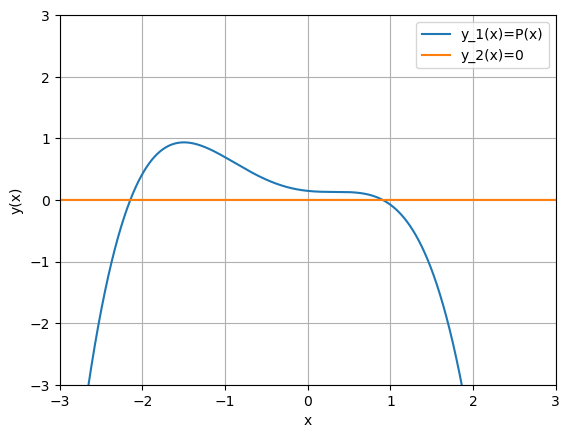

In [53]:
x = np.linspace(-10, 10, 10000)

fig, ax = plt.subplots()
ax.plot(x, P(x), label='y_1(x)=P(x)')
ax.plot(x, 0*x, label='y_2(x)=0')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Из графика заметно, что вещественных корней у данного многочлена 2, а соответственно и 2 комплекснозначных (комплексно-сопряженных). Также заметим, что среди всех возможных вещественных корней мы действительно нашли тот, который является наибольшим по модулю.

С помощью системы Wolfram Mathematica найдем расположение всех корней и на комплексной плоскости:

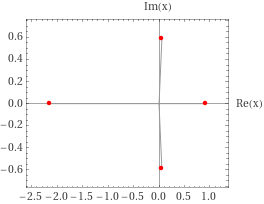

Заметно, что и комплексные корни данного многочлена по модулю сильно меньше того корня, который мы вычислили.

### Вывод
Таким образом, мы смогли найти наибольший по модулю корень для алгебраического уравнения с помощью применения метода Лобачевского.